### Accident Data Analysis and Modelling

### Import the required libraries

In [3]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Create connection to the SQL database

In [4]:
#creating connection to the accident database
con = sqlite3.connect("accident_data_v1.0.0_2023.db")
cur = con.cursor()

### Data Preprocessing: Retrieving 2020 Information from the database

In [5]:
# Retrieve the column names for accident, vehicle, casualty, and lsoa tables
accident_columns = [column_name[1] for column_name in cur.execute("PRAGMA table_info(accident)").fetchall()]
vehicle_columns = [column_name[1] for column_name in cur.execute("PRAGMA table_info(vehicle)").fetchall()]
casualty_columns = [column_name[1] for column_name in cur.execute("PRAGMA table_info(casualty)").fetchall()]
lsoa_columns = [column_name[1] for column_name in cur.execute("PRAGMA table_info(lsoa)").fetchall()]

# Retrieve the rows for accident, vehicle, casualty, and lsoa tables
accident_rows = cur.execute("SELECT * FROM accident WHERE accident_year = 2020").fetchall()
vehicle_rows = cur.execute("SELECT * FROM vehicle WHERE accident_year = 2020").fetchall()
casualty_rows = cur.execute("SELECT * FROM casualty WHERE accident_year = 2020").fetchall()
lsoa_rows = cur.execute("SELECT * FROM lsoa").fetchall()

### Data Preprocessing: Convert necessary tables to dataframes

In [6]:
# Create Pandas DataFrames for accident, vehicle, casualty and lsoa tables
accident_df = pd.DataFrame(accident_rows, columns=accident_columns)
vehicle_df = pd.DataFrame(vehicle_rows, columns=vehicle_columns)
casualty_df = pd.DataFrame(casualty_rows, columns=casualty_columns)
lsoa_df = pd.DataFrame(lsoa_rows, columns=lsoa_columns)

### Exploratory Data Analysis (EDA) & Cleaning: accident_df

##### Exploring the accident dataframe

In [7]:
#checking rows and columns info
accident_df

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,0,4,1,1,0,0,1,1,2,E01004763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,0,1,1,1,0,0,1,1,-1,-1
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1,0,0,1,2,-1,-1
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,0,1,1,1,0,0,2,1,-1,-1
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,0,1,1,1,0,0,1,2,-1,-1


In [8]:
#the dataframe structure, type and other relevant information
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91199 non-null  object 
 1   accident_year                                91199 non-null  int64  
 2   accident_reference                           91199 non-null  object 
 3   location_easting_osgr                        91185 non-null  float64
 4   location_northing_osgr                       91185 non-null  float64
 5   longitude                                    91185 non-null  float64
 6   latitude                                     91185 non-null  float64
 7   police_force                                 91199 non-null  int64  
 8   accident_severity                            91199 non-null  int64  
 9   number_of_vehicles                           91199 non-null  int64  
 10

In [9]:
#checking for NAN entries
accident_df.isnull().sum()

accident_index                                  0
accident_year                                   0
accident_reference                              0
location_easting_osgr                          14
location_northing_osgr                         14
longitude                                      14
latitude                                       14
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                                            0
local_authority_district                        0
local_authority_ons_district                    0
local_authority_highway                         0
first_road_class                                0
first_road_number                               0
road_type                                       0


In [10]:
# Cleaning NAN entries in the accident dataframe

#applying median inputation to the missing (NAN) entries
location_easting_osgr_median = accident_df["location_easting_osgr"].median()
location_northing_osgr_median = accident_df["location_northing_osgr"].median()
longitude_median = accident_df["longitude"].median()
latitude_median = accident_df["latitude"].median()

#cleaning the NAN entries with the median values of each entry
def clean_nan():
    accident_df["location_easting_osgr"].fillna("location_easting_osgr_median", inplace=True)
    accident_df["location_northing_osgr"].fillna("location_northing_osgr_median", inplace=True)
    accident_df["longitude"].fillna("longitude_median", inplace=True)
    accident_df["latitude"].fillna("latiitude_median", inplace=True)
clean_nan()

In [11]:
#cross-checking the cleaned dataframe
accident_df.isnull().sum()

accident_index                                 0
accident_year                                  0
accident_reference                             0
location_easting_osgr                          0
location_northing_osgr                         0
longitude                                      0
latitude                                       0
police_force                                   0
accident_severity                              0
number_of_vehicles                             0
number_of_casualties                           0
date                                           0
day_of_week                                    0
time                                           0
local_authority_district                       0
local_authority_ons_district                   0
local_authority_highway                        0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit         

In [12]:
#checking all column names in the accident dataframe
accident_df.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')

#### #exploring the vehicle dataframe

In [13]:
#checking rows and columns info
vehicle_df

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,681716,2020010219808,2020,010219808,1,9,9,5,1,5,...,6,2,32,6,1968,2,6,AUDI Q5,4,1
1,681717,2020010220496,2020,010220496,1,9,0,4,2,6,...,2,1,45,7,1395,1,2,AUDI A1,7,1
2,681718,2020010228005,2020,010228005,1,9,0,18,-1,-1,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,681719,2020010228006,2020,010228006,1,8,0,18,1,5,...,1,1,44,7,1798,8,8,TOYOTA PRIUS,2,1
4,681720,2020010228011,2020,010228011,1,9,0,18,3,7,...,6,1,20,4,2993,2,4,BMW 4 SERIES,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167370,849086,2020991030297,2020,991030297,1,9,0,7,8,2,...,1,1,57,9,1968,2,2,AUDI A5,7,1
167371,849087,2020991030297,2020,991030297,2,5,0,16,6,2,...,5,1,38,7,1301,1,2,KTM 1290 SUPERDUKE,9,2
167372,849088,2020991030900,2020,991030900,1,9,0,7,8,2,...,6,2,68,10,1995,2,1,BMW X3,5,1
167373,849089,2020991030900,2020,991030900,2,1,0,18,6,2,...,6,1,76,11,-1,-1,-1,-1,9,1


In [14]:
#the dataframe structure, type and other relevant information
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167375 entries, 0 to 167374
Data columns (total 28 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   vehicle_index                     167375 non-null  int64 
 1   accident_index                    167375 non-null  object
 2   accident_year                     167375 non-null  int64 
 3   accident_reference                167375 non-null  object
 4   vehicle_reference                 167375 non-null  int64 
 5   vehicle_type                      167375 non-null  int64 
 6   towing_and_articulation           167375 non-null  int64 
 7   vehicle_manoeuvre                 167375 non-null  int64 
 8   vehicle_direction_from            167375 non-null  int64 
 9   vehicle_direction_to              167375 non-null  int64 
 10  vehicle_location_restricted_lane  167375 non-null  int64 
 11  junction_location                 167375 non-null  int64 
 12  sk

In [15]:
#checking for nan entries
vehicle_df.isnull().sum()

vehicle_index                       0
accident_index                      0
accident_year                       0
accident_reference                  0
vehicle_reference                   0
vehicle_type                        0
towing_and_articulation             0
vehicle_manoeuvre                   0
vehicle_direction_from              0
vehicle_direction_to                0
vehicle_location_restricted_lane    0
junction_location                   0
skidding_and_overturning            0
hit_object_in_carriageway           0
vehicle_leaving_carriageway         0
hit_object_off_carriageway          0
first_point_of_impact               0
vehicle_left_hand_drive             0
journey_purpose_of_driver           0
sex_of_driver                       0
age_of_driver                       0
age_band_of_driver                  0
engine_capacity_cc                  0
propulsion_code                     0
age_of_vehicle                      0
generic_make_model                  0
driver_imd_d

In [16]:
#printing all comun names
vehicle_df.columns

Index(['vehicle_index', 'accident_index', 'accident_year',
       'accident_reference', 'vehicle_reference', 'vehicle_type',
       'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'vehicle_left_hand_drive',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
       'age_band_of_driver', 'engine_capacity_cc', 'propulsion_code',
       'age_of_vehicle', 'generic_make_model', 'driver_imd_decile',
       'driver_home_area_type'],
      dtype='object')

#### exploring the casualty dataframe

In [17]:
#checking rows and columns info
casualty_df

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,484748,2020010219808,2020,010219808,1,1,3,1,31,6,3,9,5,0,0,0,0,1,4
1,484749,2020010220496,2020,010220496,1,1,3,2,2,1,3,1,1,0,0,0,0,1,2
2,484750,2020010220496,2020,010220496,1,2,3,2,4,1,3,1,1,0,0,0,0,1,2
3,484751,2020010228005,2020,010228005,1,1,3,1,23,5,3,5,9,0,0,0,0,1,3
4,484752,2020010228006,2020,010228006,1,1,3,1,47,8,2,4,1,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115579,600327,2020991027064,2020,991027064,2,1,1,1,11,3,2,0,0,0,0,0,1,1,2
115580,600328,2020991029573,2020,991029573,1,1,3,2,63,9,3,10,1,0,0,0,0,1,10
115581,600329,2020991030297,2020,991030297,2,1,1,1,38,7,2,0,0,0,0,0,5,2,9
115582,600330,2020991030900,2020,991030900,2,1,1,1,76,11,3,0,0,0,0,0,1,1,9


In [18]:
#the dataframe structure, type and other relevant information
casualty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115584 entries, 0 to 115583
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   casualty_index                      115584 non-null  int64 
 1   accident_index                      115584 non-null  object
 2   accident_year                       115584 non-null  int64 
 3   accident_reference                  115584 non-null  object
 4   vehicle_reference                   115584 non-null  int64 
 5   casualty_reference                  115584 non-null  int64 
 6   casualty_class                      115584 non-null  int64 
 7   sex_of_casualty                     115584 non-null  int64 
 8   age_of_casualty                     115584 non-null  int64 
 9   age_band_of_casualty                115584 non-null  int64 
 10  casualty_severity                   115584 non-null  int64 
 11  pedestrian_location                 115

In [19]:
#checking for missing (nan) entries
casualty_df.isnull().sum()

casualty_index                        0
accident_index                        0
accident_year                         0
accident_reference                    0
vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
dtype: int64

In [20]:
#printing column names
casualty_df.columns

Index(['casualty_index', 'accident_index', 'accident_year',
       'accident_reference', 'vehicle_reference', 'casualty_reference',
       'casualty_class', 'sex_of_casualty', 'age_of_casualty',
       'age_band_of_casualty', 'casualty_severity', 'pedestrian_location',
       'pedestrian_movement', 'car_passenger', 'bus_or_coach_passenger',
       'pedestrian_road_maintenance_worker', 'casualty_type',
       'casualty_home_area_type', 'casualty_imd_decile'],
      dtype='object')

#### eploring the Lower Layer Super Output Area (LSOA) dataframe

In [21]:
#checking rows and columns info
lsoa_df

,objectid,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid
0,1,E01000001,City of London 001A,City of London 001A,1.298652e+05,2635.772001,68cc6127-1008-4fbe-a16c-78fb089a7c43
1,2,E01000002,City of London 001B,City of London 001B,2.284189e+05,2707.986202,937edbc3-c1bf-4d35-b274-b0a1480a7c09
2,3,E01000003,City of London 001C,City of London 001C,5.905477e+04,1224.774479,2686dcaf-10b9-4736-92af-4788d4feaa69
3,4,E01000004,City of London 001D,City of London 001D,2.544551e+06,10718.466240,3c493140-0b3f-4b9a-b358-22011dc5fb89
4,5,E01000005,City of London 001E,City of London 001E,1.895782e+05,2275.809358,b569093d-788d-41be-816c-d6d7658b2311
...,...,...,...,...,...,...,...
34373,34374,W01001892,Cardiff 020D,Caerdydd 020D,2.699088e+05,2537.220060,1a25aa1e-5db5-4d32-8355-473409dbd69f
34374,34375,W01001893,Cardiff 010B,Caerdydd 010B,4.288488e+06,9807.284401,b6af5e24-eb2a-404a-98a6-a282037b3e10
34375,34376,W01001894,Cardiff 010C,Caerdydd 010C,3.337511e+05,2929.546177,72d16f53-115d-4926-936d-2f1b1d659d46
34376,34377,W01001895,Cardiff 010D,Caerdydd 010D,1.360174e+06,8141.281226,8e105eb9-f68e-4cdb-bca6-b49f6592cb71


In [22]:
#the dataframe structure, type and other relevant information
lsoa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34378 entries, 0 to 34377
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   objectid       34378 non-null  int64  
 1   lsoa01cd       34378 non-null  object 
 2   lsoa01nm       34378 non-null  object 
 3   lsoa01nmw      34378 non-null  object 
 4   shape__area    34378 non-null  float64
 5   shape__length  34378 non-null  float64
 6   globalid       34378 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.8+ MB


In [23]:
#checking for missing (nan) entries
lsoa_df.isnull().sum()

objectid         0
lsoa01cd         0
lsoa01nm         0
lsoa01nmw        0
shape__area      0
shape__length    0
globalid         0
dtype: int64

In [24]:
#printing the column names
lsoa_df.columns

Index(['objectid', 'lsoa01cd', 'lsoa01nm', 'lsoa01nmw', 'shape__area',
       'shape__length', 'globalid'],
      dtype='object')

#### Answering the required Questions

### 1. Are there significant hours of the day, and days of the week, on which accidents occur?

In [25]:
accident_df.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')

In [26]:
#converting time and date to datetime format for pandas
accident_df['converted_time'] = pd.to_datetime(accident_df['time'])
accident_df['decimal_time'] = accident_df['converted_time'].dt.hour + accident_df['converted_time'].dt.minute / 60

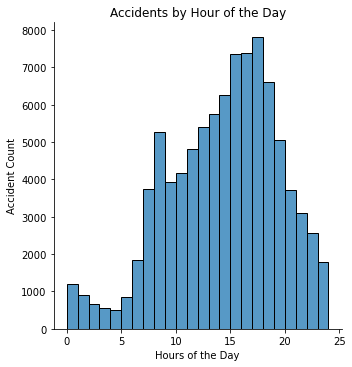

In [27]:
# Plotting the results for hours of the day on which accident occur
hours_of_the_day = accident_df['decimal_time']
sns.displot(x = hours_of_the_day, binwidth = 1)
plt.xlabel('Hours of the Day')
plt.ylabel('Accident Count')
plt.title('Accidents by Hour of the Day')
plt.show()


In [57]:
# # Significant hours of the day when accidents occur falls between 15:00-18:00 as indicated on the chart above

# Calculate the number of motorbike accidents that occurred between 15:00 and 19:00
significant_hrs_max_15hr = ((accident_df["decimal_time"] >= 15) & (accident_df["decimal_time"] < 16)).sum()
significant_hrs_max_16hr = ((accident_df["decimal_time"] >= 16) & (accident_df["decimal_time"] < 17)).sum()
significant_hrs_max_17hr = ((accident_df["decimal_time"] >= 17) & (accident_df["decimal_time"] < 18)).sum()
significant_hrs_max_18hr = ((accident_df["decimal_time"] >= 18) & (accident_df["decimal_time"] < 19)).sum()
significant_hrs_max_19hr = ((accident_df["decimal_time"] >= 19) & (accident_df["decimal_time"] < 20)).sum()

#Print motobike accident count for significant hours
print("Significant hours of the days with accidents")
print(f"Between 15:00-16:00 accident is {significant_hrs_max_15hr}")
print(f"Between 16:00-17:00 accident is {significant_hrs_max_16hr}")
print(f"Between 17:00-18:00 accident is {significant_hrs_max_17hr}")
print(f"Between 18:00-19:00 accident is {significant_hrs_max_18hr}")
print(f"Between 19:00-20:00 accident is {significant_hrs_max_19hr}")

Significant hours of the days with accidents
Between 15:00-16:00 accident is 7361
Between 16:00-17:00 accident is 7381
Between 17:00-18:00 accident is 7813
Between 18:00-19:00 accident is 6618
Between 19:00-20:00 accident is 5048


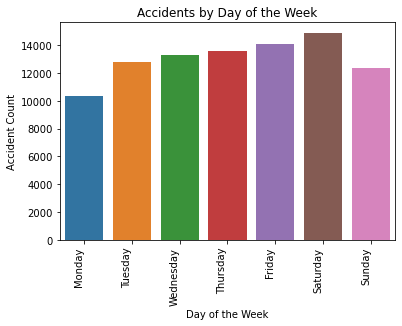

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Accidents by Day of the Week')

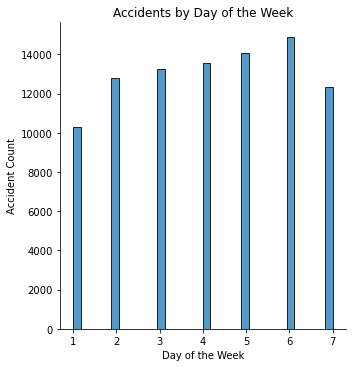

In [29]:
#days of the week on which accidents occur
day_of_week = accident_df["day_of_week"]
sns.countplot(x = day_of_week)
plt.xlabel('Day of the Week')
plt.ylabel('Accident Count')
plt.title('Accidents by Day of the Week')
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(range(7), days_of_week, rotation=90, ha='right') 
plt.figure(figsize=(10, 6))
plt.show()

sns.displot(x = day_of_week)
plt.xlabel('Day of the Week')
plt.ylabel('Accident Count')
plt.title('Accidents by Day of the Week')

In [30]:
#Significant days of the week on which accidents occur are Saturdays (day 6), Friday (day 5) and Thursday (day 4)
significant_days = day_of_week.value_counts(ascending = True)
print(significant_days.nlargest(3))

6    14889
5    14056
4    13564
Name: day_of_week, dtype: int64


### 2. For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur? We suggest a focus on: Motorcycle 125cc and under, Motorcycle over 125cc and up to 500cc, and Motorcycle over 500cc.

In [31]:
# Filtering the data for each motorcycle category
motorcycle_125cc_and_under = (vehicle_df["vehicle_type"] == 3).sum()
motorcycle_125cc_to_500cc = (vehicle_df["vehicle_type"] == 4).sum()
motorcycle_over_500cc = (vehicle_df["vehicle_type"] == 5).sum()

# Calculate the counts for each motorcycle category
motorcycle_125cc_and_under = (vehicle_df["vehicle_type"] == 3).sum()
motorcycle_125cc_to_500cc = (vehicle_df["vehicle_type"] == 4).sum()
motorcycle_over_500cc = (vehicle_df["vehicle_type"] == 5).sum()

# Print the counts for each motorcycle category
print("Motorcycle 125cc and under:", motorcycle_125cc_and_under)
print("Motorcycle over 125cc and up to 500cc:", motorcycle_125cc_to_500cc)
print("Motorcycle over 500cc:", motorcycle_over_500cc)


Motorcycle 125cc and under: 7523
Motorcycle over 125cc and up to 500cc: 1691
Motorcycle over 500cc: 3784


In [32]:
# Merge 'accident_df' with 'vehicle_df' on 'accident_index' to get vehicle information
av_df = pd.merge(accident_df, vehicle_df[['accident_index', 'vehicle_type']], on='accident_index')

# Filter data for Motorcycle 125cc and under
motorcycle_125cc_and_under_df = av_df[av_df['vehicle_type'] == 3]
motorcycle_125cc_to_500cc_df = av_df[av_df['vehicle_type'] == 4]
motorcycle_over_500cc_df = av_df[av_df['vehicle_type'] == 5]

# Group the data by day of the week and hour of the day and calculate the accident count
motorcycle_125cc_and_under_count = motorcycle_125cc_and_under_df.groupby([day_of_week, hours_of_the_day]).size().reset_index(name='accident_count')
motorcycle_125cc_to_500cc_count = motorcycle_125cc_to_500cc_df.groupby([day_of_week, hours_of_the_day]).size().reset_index(name='accident_count')
motorcycle_over_500cc_count = motorcycle_over_500cc_df.groupby([day_of_week, hours_of_the_day]).size().reset_index(name='accident_count')
                            
# Convert numeric representation of day of the week to day names
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
motorcycle_125cc_and_under_count["day_of_week"] = motorcycle_125cc_and_under_count["day_of_week"].astype(int)
motorcycle_125cc_to_500cc_count["day_of_week"] = motorcycle_125cc_to_500cc_count["day_of_week"].astype(int)
motorcycle_over_500cc_count["day_of_week"] = motorcycle_over_500cc_count["day_of_week"].astype(int)
av_df["day_of_week"] = av_df["day_of_week"].map(lambda x: days[x % 7])

# Display the resulting DataFrames
print("Motorcycle 125cc and under:")
print(motorcycle_125cc_and_under_count, )

print("\nMotorcycle 125cc to 500cc:")
print(motorcycle_125cc_to_500cc_count)

print("\nMotorcycle over 500cc:")
print(motorcycle_over_500cc_count)                         


Motorcycle 125cc and under:
      day_of_week  decimal_time  accident_count
0               1      0.033333               2
1               1      0.066667               1
2               1      0.333333               4
3               1      0.500000               1
4               1      0.516667               1
...           ...           ...             ...
2895            7     23.616667               1
2896            7     23.800000               1
2897            7     23.833333               2
2898            7     23.883333               1
2899            7     23.900000               1

[2900 rows x 3 columns]

Motorcycle 125cc to 500cc:
     day_of_week  decimal_time  accident_count
0              1      0.033333               1
1              1      0.300000               1
2              1      0.533333               1
3              1      0.600000               1
4              1      0.750000               1
..           ...           ...             ...
832           

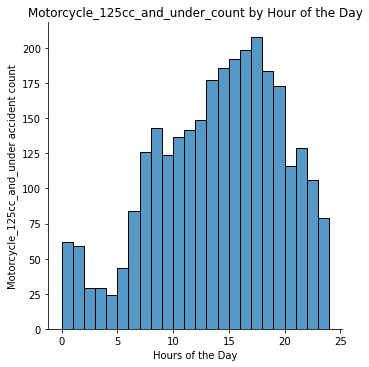

In [34]:
#Plot motorbike accidents for motorcycle_125cc_and_under_count
hours_of_the_day_motorcycle_125cc_to_500cc_count = motorcycle_125cc_and_under_count["decimal_time"]
sns.displot(x = hours_of_the_day_motorcycle_125cc_to_500cc_count, binwidth = 1)
plt.xlabel('Hours of the Day')
plt.ylabel('Motorcycle_125cc_and_under accident count')
plt.title('Motorcycle_125cc_and_under_count by Hour of the Day')
plt.show()

In [50]:
# Significant hours of the day when motorcycle_125cc_and_under accidents occur 
# falls between 15:00-19:00 as indicated on the chart above

# Calculate the number of motorbike accidents that occurred between 15:00 and 18:00
motorbike_significant_hrs_max_15hr = ((motorcycle_125cc_and_under_count["decimal_time"] >= 15) & (motorcycle_125cc_and_under_count["decimal_time"] < 16)).sum()
motorbike_significant_hrs_max_16hr = ((motorcycle_125cc_and_under_count["decimal_time"] >= 16) & (motorcycle_125cc_and_under_count["decimal_time"] < 17)).sum()
motorbike_significant_hrs_max_17hr = ((motorcycle_125cc_and_under_count["decimal_time"] >= 17) & (motorcycle_125cc_and_under_count["decimal_time"] < 18)).sum()
motorbike_significant_hrs_max_18hr = ((motorcycle_125cc_and_under_count["decimal_time"] >= 18) & (motorcycle_125cc_and_under_count["decimal_time"] < 19)).sum()
motorbike_significant_hrs_max_19hr = ((motorcycle_125cc_and_under_count["decimal_time"] >= 19) & (motorcycle_125cc_and_under_count["decimal_time"] < 20)).sum()

#Print motobike accident count for significant hours
print("Significant hours of the day with motorcycle_125cc_and_under accidents")
print(f"Between 15:00-16:00 motorbike accident count is {motorbike_significant_hrs_max_15hr}")
print(f"Between 16:00-17:00 motorbike accident count is {motorbike_significant_hrs_max_16hr}")
print(f"Between 17:00-18:00 motorbike accident count is {motorbike_significant_hrs_max_17hr}")
print(f"Between 18:00-19:00 motorbike accident count is {motorbike_significant_hrs_max_18hr}")
print(f"Between 19:00-20:00 motorbike accident count is {motorbike_significant_hrs_max_19hr}")

Significant hours of the day with motorcycle_125cc_and_under accidents
Between 15:00-16:00 motorbike accident count is 192
Between 16:00-17:00 motorbike accident count is 199
Between 17:00-18:00 motorbike accident count is 208
Between 18:00-19:00 motorbike accident count is 184
Between 19:00-20:00 motorbike accident count is 173


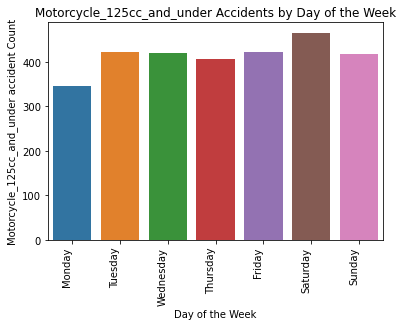

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Motorcycle_125cc_and_under Accidents by Day of the Week')

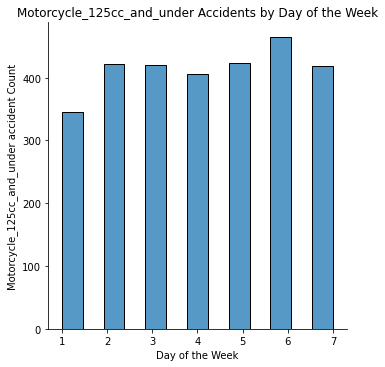

In [36]:
#Plot showing the days of the week which Motorcycle_125cc_and_under accidents occur
day_of_week_motorbike = motorcycle_125cc_and_under_count["day_of_week"]
sns.countplot(x = day_of_week_motorbike)
plt.xlabel('Day of the Week')
plt.ylabel('Motorcycle_125cc_and_under accident Count')
plt.title('Motorcycle_125cc_and_under Accidents by Day of the Week')
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(range(7), days_of_week, rotation=90, ha='right') 
plt.figure(figsize=(10, 6))
plt.show()

sns.displot(x = day_of_week_motorbike)
plt.xlabel('Day of the Week')
plt.ylabel('Motorcycle_125cc_and_under accident Count')
plt.title('Motorcycle_125cc_and_under Accidents by Day of the Week')

In [37]:
#Significant days of the week which Motorcycle_125cc_and_under accidents occur are Saturdays (day 6) & Fridays (day 5)
significant_days_motorbike = day_of_week_motorbike.value_counts(ascending = True)
print(significant_days_motorbike.nlargest(2))

6    465
5    423
Name: day_of_week, dtype: int64


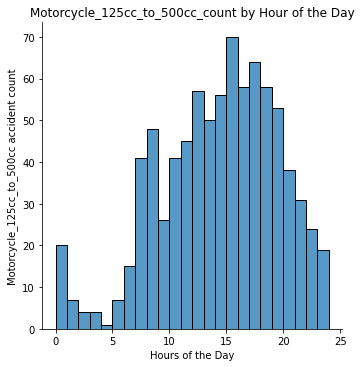

In [38]:
#Plot motorbike accidents for motorcycle_125cc_to_500cc_count
hours_of_the_day_motorcycle_125cc_to_500cc_count = motorcycle_125cc_to_500cc_count["decimal_time"]
sns.displot(x = hours_of_the_day_motorcycle_125cc_to_500cc_count, binwidth = 1)
plt.xlabel('Hours of the Day')
plt.ylabel('Motorcycle_125cc_to_500cc accident count')
plt.title('Motorcycle_125cc_to_500cc_count by Hour of the Day')
plt.show()

In [49]:
# Significant hours of the day when motorcycle_125cc_to_500cc accidents occur 
# falls between 15:00-19:00 as indicated on the chart above

# Calculate the number of motorbike accidents that occurred between 16:00 and 18:00
motorbike_significant_hrs_max_15hr = ((motorcycle_125cc_to_500cc_count["decimal_time"] >= 15) & (motorcycle_125cc_to_500cc_count["decimal_time"] < 16)).sum()
motorbike_significant_hrs_max_16hr = ((motorcycle_125cc_to_500cc_count["decimal_time"] >= 16) & (motorcycle_125cc_to_500cc_count["decimal_time"] < 17)).sum()
motorbike_significant_hrs_max_17hr = ((motorcycle_125cc_to_500cc_count["decimal_time"] >= 17) & (motorcycle_125cc_to_500cc_count["decimal_time"] < 18)).sum()
motorbike_significant_hrs_max_18hr = ((motorcycle_125cc_to_500cc_count["decimal_time"] >= 18) & (motorcycle_125cc_to_500cc_count["decimal_time"] < 19)).sum()
motorbike_significant_hrs_max_19hr = ((motorcycle_125cc_to_500cc_count["decimal_time"] >= 19) & (motorcycle_125cc_to_500cc_count["decimal_time"] < 20)).sum()

#Print motobike accident count for significant hours
print("Significant hours of the day with motorcycle_125cc_to_500cc accidents")
print(f"Between 15:00-16:00 motorbike accident count is {motorbike_significant_hrs_max_15hr}")
print(f"Between 16:00-17:00 motorbike accident count is {motorbike_significant_hrs_max_16hr}")
print(f"Between 17:00-18:00 motorbike accident count is {motorbike_significant_hrs_max_17hr}")
print(f"Between 18:00-19:00 motorbike accident count is {motorbike_significant_hrs_max_18hr}")
print(f"Between 19:00-20:00 motorbike accident count is {motorbike_significant_hrs_max_19hr}")

Significant hours of the day with motorcycle_125cc_to_500cc accidents
Between 15:00-16:00 motorbike accident count is 70
Between 16:00-17:00 motorbike accident count is 58
Between 17:00-18:00 motorbike accident count is 64
Between 18:00-19:00 motorbike accident count is 58
Between 19:00-20:00 motorbike accident count is 53


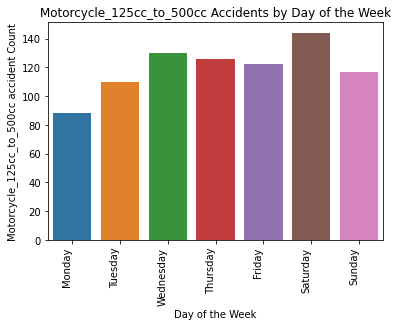

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Motorcycle_125cc_to_500cc Accidents by Day of the Week')

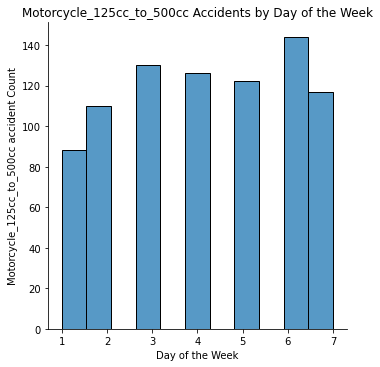

In [40]:
#Plot showing the days of the week which Motorcycle_125cc_and_under accidents occur
day_of_week_motorbike02 = motorcycle_125cc_to_500cc_count["day_of_week"]
sns.countplot(x = day_of_week_motorbike02)
plt.xlabel('Day of the Week')
plt.ylabel('Motorcycle_125cc_to_500cc accident Count')
plt.title('Motorcycle_125cc_to_500cc Accidents by Day of the Week')
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(range(7), days_of_week, rotation=90, ha='right') 
plt.figure(figsize=(10, 6))
plt.show()

sns.displot(x = day_of_week_motorbike02)
plt.xlabel('Day of the Week')
plt.ylabel('Motorcycle_125cc_to_500cc accident Count')
plt.title('Motorcycle_125cc_to_500cc Accidents by Day of the Week')

In [41]:
#Significant days of the week which motorcycle_125cc_to_500cc accidents occur are Saturdays (day 6) & Wednesdays (day 3)
significant_days_motorbike = day_of_week_motorbike02.value_counts(ascending = True)
print(significant_days_motorbike.nlargest(2))

6    144
3    130
Name: day_of_week, dtype: int64


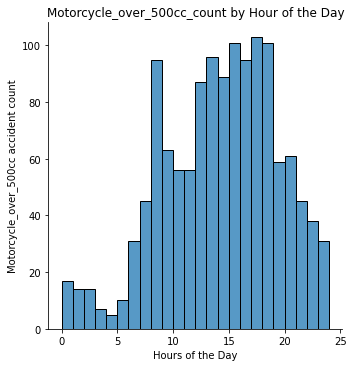

In [42]:
#Plot motorbike accidents for motorcycle_over_500cc_count
hours_of_the_day_motorcycle_over_500cc_count = motorcycle_over_500cc_count["decimal_time"]
sns.displot(x = hours_of_the_day_motorcycle_over_500cc_count, binwidth = 1)
plt.xlabel('Hours of the Day')
plt.ylabel('Motorcycle_over_500cc accident count')
plt.title('Motorcycle_over_500cc_count by Hour of the Day')
plt.show()

In [48]:
# Significant hours of the day when motorcycle_over_500cc_count accidents occur 
# falls between 15:00-19:00 as indicated on the chart above

# Calculate the number of motorbike accidents that occurred between 16:00 and 18:00
motorbike_significant_hrs_max_15hr = ((motorcycle_over_500cc_count["decimal_time"] >= 15) & (motorcycle_over_500cc_count["decimal_time"] < 16)).sum()
motorbike_significant_hrs_max_16hr = ((motorcycle_over_500cc_count["decimal_time"] >= 16) & (motorcycle_over_500cc_count["decimal_time"] < 17)).sum()
motorbike_significant_hrs_max_17hr = ((motorcycle_over_500cc_count["decimal_time"] >= 17) & (motorcycle_over_500cc_count["decimal_time"] < 18)).sum()
motorbike_significant_hrs_max_18hr = ((motorcycle_over_500cc_count["decimal_time"] >= 18) & (motorcycle_over_500cc_count["decimal_time"] < 19)).sum()
motorbike_significant_hrs_max_19hr = ((motorcycle_over_500cc_count["decimal_time"] >= 19) & (motorcycle_over_500cc_count["decimal_time"] < 20)).sum()

#Print motobike accident count for significant hours
print("Significant hours of the day with motorcycle_over_500cc accidents")
print(f"Between 15:00-16:00 motorbike accident count is {motorbike_significant_hrs_max_15hr}")
print(f"Between 16:00-17:00 motorbike accident count is {motorbike_significant_hrs_max_16hr}")
print(f"Between 17:00-18:00 motorbike accident count is {motorbike_significant_hrs_max_17hr}")
print(f"Between 18:00-19:00 motorbike accident count is {motorbike_significant_hrs_max_18hr}")
print(f"Between 19:00-20:00 motorbike accident count is {motorbike_significant_hrs_max_19hr}")

Significant hours of the day with motorcycle_over_500cc accidents
Between 15:00-16:00 motorbike accident count is 101
Between 16:00-17:00 motorbike accident count is 95
Between 17:00-18:00 motorbike accident count is 103
Between 18:00-19:00 motorbike accident count is 101
Between 19:00-20:00 motorbike accident count is 59


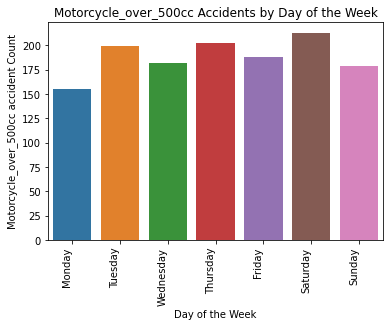

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Motorcycle_over_500cc Accidents by Day of the Week')

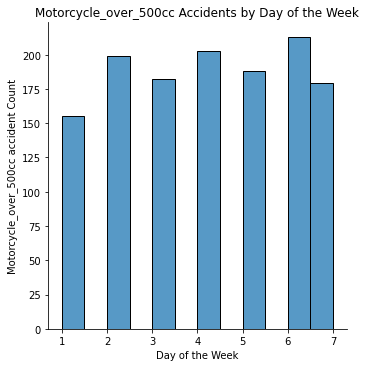

In [43]:
#Plot showing the days of the week which motorcycle_over_500cc accidents occur
day_of_week_motorbike04 = motorcycle_over_500cc_count["day_of_week"]
sns.countplot(x = day_of_week_motorbike04)
plt.xlabel('Day of the Week')
plt.ylabel('Motorcycle_over_500cc accident Count')
plt.title('Motorcycle_over_500cc Accidents by Day of the Week')
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(range(7), days_of_week, rotation=90, ha='right') 
plt.figure(figsize=(10, 6))
plt.show()

sns.displot(x = day_of_week_motorbike04)
plt.xlabel('Day of the Week')
plt.ylabel('Motorcycle_over_500cc accident Count')
plt.title('Motorcycle_over_500cc Accidents by Day of the Week')

In [44]:
#Significant days of the week which motorcycle_over_500cc accidents occur are Saturdays (day 6) & Thursdays (day 4)
significant_days_motorbike = day_of_week_motorbike04.value_counts(ascending = True)
print(significant_days_motorbike.nlargest(2))

6    213
4    203
Name: day_of_week, dtype: int64


In [45]:
# Combining the three DataFrames for motorcycle categories into one DataFrame
motorbike_df = pd.concat([motorcycle_125cc_and_under_count, 
motorcycle_125cc_to_500cc_count, motorcycle_over_500cc_count], ignore_index=True)
motorbike_df

,day_of_week,decimal_time,accident_count
0,1,0.033333,2
1,1,0.066667,1
2,1,0.333333,4
3,1,0.500000,1
4,1,0.516667,1
...,...,...,...
5051,7,23.516667,1
5052,7,23.550000,1
5053,7,23.833333,1
5054,7,23.850000,1


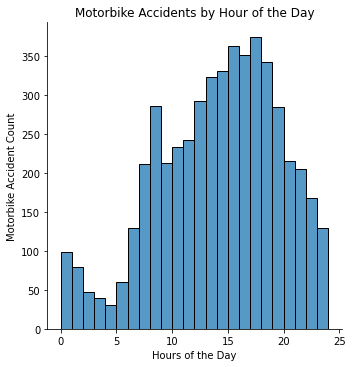

In [46]:
#Plot motorbike accidents for the combined motorcycles dataframe
hours_of_the_day_motorbike = motorbike_df["decimal_time"]
sns.displot(x = hours_of_the_day_motorbike, binwidth = 1)
plt.xlabel('Hours of the Day')
plt.ylabel('Motorbike Accident Count')
plt.title('Motorbike Accidents by Hour of the Day')
plt.show()

In [51]:
# Significant hours of the day when motorbike accidents occur 
# falls between 15:00-20:00 as indicated on the chart above

# Calculate the number of motorbike accidents that occurred between 16:00 and 19:00
motorbike_significant_hrs_max_15hr = ((motorbike_df["decimal_time"] >= 15) & (motorbike_df["decimal_time"] < 16)).sum()
motorbike_significant_hrs_max_16hr = ((motorbike_df["decimal_time"] >= 16) & (motorbike_df["decimal_time"] < 17)).sum()
motorbike_significant_hrs_max_17hr = ((motorbike_df["decimal_time"] >= 17) & (motorbike_df["decimal_time"] < 18)).sum()
motorbike_significant_hrs_max_18hr = ((motorbike_df["decimal_time"] >= 18) & (motorbike_df["decimal_time"] < 19)).sum()
motorbike_significant_hrs_max_19hr = ((motorbike_df["decimal_time"] >= 19) & (motorbike_df["decimal_time"] < 20)).sum()

#Print motobike accident count for significant hours
print("Significant hours of the day with motorbike accidents")
print(f"Between 15:00-16:00 motorbike accident count is {motorbike_significant_hrs_max_15hr}")
print(f"Between 16:00-17:00 motorbike accident count is {motorbike_significant_hrs_max_16hr}")
print(f"Between 17:00-18:00 motorbike accident count is {motorbike_significant_hrs_max_17hr}")
print(f"Between 18:00-19:00 motorbike accident count is {motorbike_significant_hrs_max_18hr}")
print(f"Between 19:00-20:00 motorbike accident count is {motorbike_significant_hrs_max_19hr}")

Significant hours of the day with motorbike accidents
Between 15:00-16:00 motorbike accident count is 363
Between 16:00-17:00 motorbike accident count is 352
Between 17:00-18:00 motorbike accident count is 375
Between 18:00-19:00 motorbike accident count is 343
Between 19:00-20:00 motorbike accident count is 285


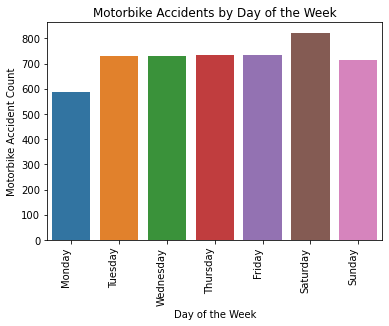

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Motorbike Accidents by Day of the Week')

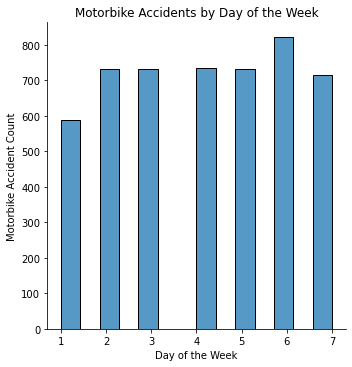

In [82]:
#Plot showing the days of the week which motorbike accidents occur
day_of_week_motorbike = motorbike_df["day_of_week"]
sns.countplot(x = day_of_week_motorbike)
plt.xlabel('Day of the Week')
plt.ylabel('Motorbike Accident Count')
plt.title('Motorbike Accidents by Day of the Week')
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(range(7), days_of_week, rotation=90, ha='right') 
plt.figure(figsize=(10, 6))
plt.show()

sns.displot(x = day_of_week_motorbike)
plt.xlabel('Day of the Week')
plt.ylabel('Motorbike Accident Count')
plt.title('Motorbike Accidents by Day of the Week')

In [83]:
#Significant days of the week which motorbike accidents occur are Saturdays (day 6), Thursdays (day 4) & Fridays (day 5)
significant_days_motorbike = day_of_week_motorbike.value_counts(ascending = True)
print(significant_days_motorbike.nlargest(7))

6    822
4    735
5    733
3    732
2    731
7    714
1    589
Name: day_of_week, dtype: int64


### 3. For pedestrians involved in accidents, are there significant hours of the day, and days of the week, on which they are more likely to be involved?

In [54]:
# Merge 'accident_df' with 'casualty_df' on 'accident_index' to get pedestrian information
ac_df = pd.merge(accident_df, casualty_df[['accident_index', 'casualty_class']], on='accident_index')

# Filter data for pedestrians in accident under casualty_class
pedestrians_in_accident_df = ac_df[ac_df['casualty_class'] == 3]


# Group the data by day of the week and hour of the day and calculate the accident count
pedestrians_in_accident_count = pedestrians_in_accident_df.groupby([day_of_week, hours_of_the_day]).size().reset_index(name='accident_count')
                            
# Convert numeric representation of day of the week to day names
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
pedestrians_in_accident_count["day_of_week"] = pedestrians_in_accident_count["day_of_week"].astype(int)
ac_df["day_of_week"] = ac_df["day_of_week"].map(lambda x: days[x % 7])

# Display the resulting DataFrames
print("Pedestrians in accident as casualties:")
print(pedestrians_in_accident_count)

Pedestrians in accident as casualties:
      day_of_week  decimal_time  accident_count
0               1      0.000000               1
1               1      0.016667               2
2               1      0.066667               1
3               1      0.083333               5
4               1      0.116667               2
...           ...           ...             ...
4864            7     23.733333               1
4865            7     23.750000               3
4866            7     23.816667               2
4867            7     23.833333               3
4868            7     23.966667               1

[4869 rows x 3 columns]


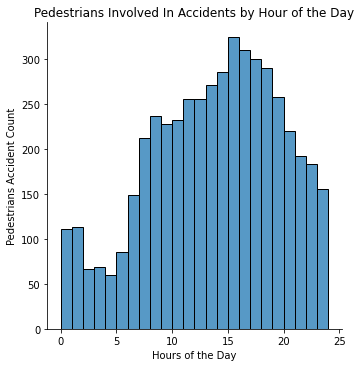

In [55]:
#Plot Pedestrian involved in accidents (i.e. casualty_class = 3)
hours_of_the_day_pedestrians = pedestrians_in_accident_count["decimal_time"]
sns.displot(x = hours_of_the_day_pedestrians, binwidth = 1)
plt.xlabel('Hours of the Day')
plt.ylabel('Pedestrians Accident Count')
plt.title('Pedestrians Involved In Accidents by Hour of the Day')
plt.show()

In [56]:
# Significant hours of the day when pedestrians are involved in accidents
# falls between 15:00-19:00 as indicated in the chart above

# Calculate the number of pedestrians accidents that occurred between 16:00 and 19:00
pedestrians_significant_hrs_max_15hr = ((pedestrians_in_accident_count["decimal_time"] >= 15) & (pedestrians_in_accident_count["decimal_time"] < 16)).sum()
pedestrians_significant_hrs_max_16hr = ((pedestrians_in_accident_count["decimal_time"] >= 16) & (pedestrians_in_accident_count["decimal_time"] < 17)).sum()
pedestrians_significant_hrs_max_17hr = ((pedestrians_in_accident_count["decimal_time"] >= 17) & (pedestrians_in_accident_count["decimal_time"] < 18)).sum()
pedestrians_significant_hrs_max_18hr = ((pedestrians_in_accident_count["decimal_time"] >= 18) & (pedestrians_in_accident_count["decimal_time"] < 19)).sum()
pedestrians_significant_hrs_max_19hr = ((pedestrians_in_accident_count["decimal_time"] >= 19) & (pedestrians_in_accident_count["decimal_time"] < 20)).sum()

#Print motobike accident count for significant hours
print("Significant hours of the day pedestrians are involved in accidents")
print(f"Between 15:00-16:00 pedestrian accident count is {pedestrians_significant_hrs_max_15hr}")
print(f"Between 16:00-17:00 pedestrian accident count is {pedestrians_significant_hrs_max_16hr}")
print(f"Between 17:00-18:00 pedestrian accident count is {pedestrians_significant_hrs_max_17hr}")
print(f"Between 18:00-19:00 pedestrian accident count is {pedestrians_significant_hrs_max_18hr}")
print(f"Between 19:00-20:00 pedestrian accident count is {pedestrians_significant_hrs_max_19hr}")

Significant hours of the day pedestrians are involved in accidents
Between 15:00-16:00 pedestrian accident count is 325
Between 16:00-17:00 pedestrian accident count is 310
Between 17:00-18:00 pedestrian accident count is 300
Between 18:00-19:00 pedestrian accident count is 290
Between 19:00-20:00 pedestrian accident count is 258


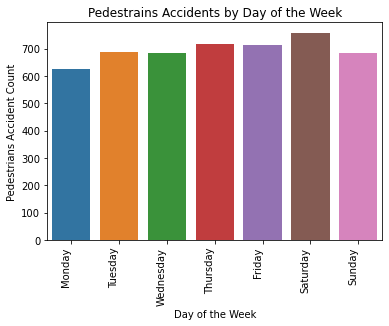

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Pedestrians Accidents by Day of the Week')

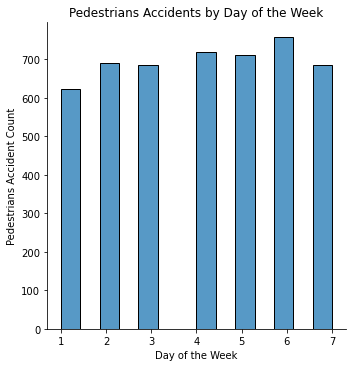

In [39]:
#Plot showing the days of the week which pedestrian accidents occur
day_of_week_pedestrians = pedestrians_in_accident_count["day_of_week"]
sns.countplot(x = day_of_week_pedestrians)
plt.xlabel('Day of the Week')
plt.ylabel('Pedestrians Accident Count')
plt.title('Pedestrains Accidents by Day of the Week')
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(range(7), days_of_week, rotation=90, ha='right') 
plt.figure(figsize=(10, 6))
plt.show()

sns.displot(x = day_of_week_pedestrians)
plt.xlabel('Day of the Week')
plt.ylabel('Pedestrians Accident Count')
plt.title('Pedestrians Accidents by Day of the Week')

In [40]:
#Significant days of the week which pedestrians accidents occur are Saturdays (day 6), Thursday (day 4) & Friday (day 5)
significant_days_pedestrians = day_of_week_pedestrians.value_counts(ascending = True)
print(significant_days_pedestrians.nlargest(3))

6    758
4    718
5    712
Name: day_of_week, dtype: int64


### 4. Using the apriori algorithm, explore the impact of selected variables on accident severity. 

In [41]:
# Selected variables on accident severity
accident_severity = accident_df["accident_severity"]
speed_limit = accident_df["speed_limit"]
road_surface_conditions = accident_df["road_surface_conditions"]

Text(0.5, 1.0, 'Speed Limit vs Accident Severity')

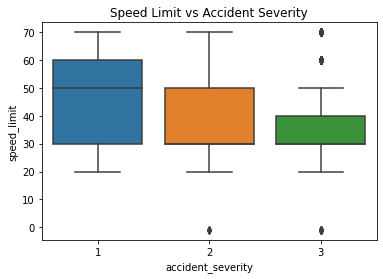

In [42]:
#visualizing speed_limit against accident severity
sns.boxplot(y = speed_limit, x= accident_severity)
plt.title("Speed Limit vs Accident Severity")

Text(0.5, 1.0, 'Road Surface Conditions vs Accident Severity')

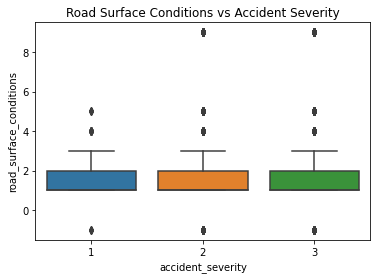

In [43]:
#visualizing road surface conditions against accident severity
sns.boxplot(y = road_surface_conditions, x = accident_severity)
plt.title("Road Surface Conditions vs Accident Severity")

In [44]:
#checking the unique entries of accident severity
accident_severity.unique()

array([3, 2, 1], dtype=int64)

In [45]:
#onehot-encoding accident severity entries
accident_severity_df = pd.get_dummies(accident_df.accident_severity, prefix = "severity")
accident_severity_df.head()

,severity_1,severity_2,severity_3
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,0,0,1


In [46]:
#checking the unique entries of speed_limit
speed_limit.unique()

array([20, 30, 40, 50, 60, 70, -1], dtype=int64)

In [47]:
#onehot-encoding speed_limit entries
speed_limit_df = pd.get_dummies(accident_df.speed_limit, prefix = "speed")
speed_limit_df.head()

,speed_-1,speed_20,speed_30,speed_40,speed_50,speed_60,speed_70
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


In [48]:
#checking the unique entries of road surface conditions
road_surface_conditions.unique()

array([ 9,  1,  2,  5,  4,  3, -1], dtype=int64)

In [49]:
#onehot-encoding road surface conditions entries
road_surface_conditions_df = pd.get_dummies(accident_df.road_surface_conditions, prefix = "road")
road_surface_conditions_df.head()

,road_-1,road_1,road_2,road_3,road_4,road_5,road_9
0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0


In [50]:
# concat all dataframes variables selected
combined_df = pd.concat([accident_severity_df, speed_limit_df, road_surface_conditions_df], axis=1)

#print combined dataframe
combined_df.head()

,severity_1,severity_2,severity_3,speed_-1,speed_20,speed_30,speed_40,speed_50,speed_60,speed_70,road_-1,road_1,road_2,road_3,road_4,road_5,road_9
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [51]:
#import required libraries for Association Pattern Mining with Apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

apm_apriori = apriori(combined_df, min_support = 0.2, use_colnames = True)

apm_apriori

D:\ANACONDA_Install\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.201263,(severity_2)
1,0.783484,(severity_3)
2,0.573033,(speed_30)
3,0.687486,(road_1)
4,0.287722,(road_2)
5,0.459983,"(severity_3, speed_30)"
6,0.538328,"(severity_3, road_1)"
7,0.224334,"(severity_3, road_2)"
8,0.407373,"(speed_30, road_1)"
9,0.327021,"(severity_3, speed_30, road_1)"


In [52]:
# Generating Rules
rules = association_rules(apm_apriori, metric = "lift", min_threshold = 0.5)

rules

D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(severity_3),(speed_30),0.783484,0.573033,0.459983,0.587099,1.024548,0.011021,1.034068,0.110660
1,(speed_30),(severity_3),0.573033,0.783484,0.459983,0.802717,1.024548,0.011021,1.097488,0.056116
2,(severity_3),(road_1),0.783484,0.687486,0.538328,0.687095,0.999432,-0.000306,0.998752,-0.002619
3,(road_1),(severity_3),0.687486,0.783484,0.538328,0.783039,0.999432,-0.000306,0.997948,-0.001816
4,(severity_3),(road_2),0.783484,0.287722,0.224334,0.286328,0.995154,-0.001092,0.998046,-0.021997
5,(road_2),(severity_3),0.287722,0.783484,0.224334,0.779687,0.995154,-0.001092,0.982766,-0.006791
6,(speed_30),(road_1),0.573033,0.687486,0.407373,0.710907,1.034068,0.013421,1.081017,0.077162
7,(road_1),(speed_30),0.687486,0.573033,0.407373,0.592555,1.034068,0.013421,1.047914,0.105422
8,"(severity_3, speed_30)",(road_1),0.459983,0.687486,0.327021,0.710942,1.034119,0.010789,1.081146,0.061096
9,"(severity_3, road_1)",(speed_30),0.538328,0.573033,0.327021,0.607475,1.060106,0.018541,1.087747,0.122810


### 5. Identify accidents in our region: Kingston upon Hull, Humberside, and the East Riding of Yorkshire etc. You can do this by filtering on LSOA, or police region or another method if you can find one. Run clustering on this data. What do these clusters reveal about the distribution of accidents in our region?

#### Identifying accidents in our region Kingston Upon Hull, Humberside, & East Riding of Yorkshire

In [53]:
# Merging the DataFrames(accident_df, vehicle_df, casualty_df & lsoa_df) to get the necessary information
merged_df = (accident_df.merge(casualty_df, on='accident_index').merge(vehicle_df, on='accident_index')
             .merge(lsoa_df, left_on='lsoa_of_accident_location', right_on='lsoa01cd'))

# Filtering the DataFrame based on specified LSOA names
filtered_df = merged_df[
    merged_df['lsoa01nm'].str.contains('Kingston Upon Hull|Humberside|East Riding of Yorkshire', case=False)]

# Outputing the required information
print("Accident Index for LSOA in Kingston Upon Hull, Humberside, & East Riding of Yorkshire")
for index, row in filtered_df.iterrows():
    accident_index = row['accident_index']
    lsoa01nm = row['lsoa01nm']
    print(f"LSOA: {lsoa01nm}, Accident Index: {accident_index}")


D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accident Index for LSOA in Kingston Upon Hull, Humberside, & East Riding of Yorkshire
LSOA: Kingston upon Hull 028E, Accident Index: 2020160914930
LSOA: Kingston upon Hull 028E, Accident Index: 2020160914930
LSOA: Kingston upon Hull 028E, Accident Index: 2020160918418
LSOA: Kingston upon Hull 028E, Accident Index: 2020160918418
LSOA: Kingston upon Hull 028E, Accident Index: 2020160936879
LSOA: Kingston upon Hull 028E, Accident Index: 2020160936879
LSOA: Kingston upon Hull 028E, Accident Index: 2020160947046
LSOA: Kingston upon Hull 028E, Accident Index: 2020160951627
LSOA: Kingston upon Hull 028E, Accident Index: 2020160951627
LSOA: Kingston upon Hull 028E, Accident Index: 2020160983147
LSOA: Kingston upon Hull 028E, Accident Index: 2020160983147
LSOA: Kingston upon Hull 028E, Accident Index: 2020160990233
LSOA: Kingston upon Hull 028E, Accident Index: 2020160990233
LSOA: Kingston upon Hull 028E, Accident Index: 2020161008991
LSOA: Kingston upon Hull 028E, Accident Index: 2020161008991

LSOA: East Riding of Yorkshire 020A, Accident Index: 2020160978325
LSOA: East Riding of Yorkshire 020A, Accident Index: 2020160978325
LSOA: East Riding of Yorkshire 020A, Accident Index: 2020160978325
LSOA: East Riding of Yorkshire 020A, Accident Index: 2020160978325
LSOA: East Riding of Yorkshire 020A, Accident Index: 2020160978325
LSOA: East Riding of Yorkshire 020A, Accident Index: 2020160978325
LSOA: East Riding of Yorkshire 020A, Accident Index: 2020160978325
LSOA: East Riding of Yorkshire 020A, Accident Index: 2020160978325
LSOA: East Riding of Yorkshire 020A, Accident Index: 2020160978325
LSOA: East Riding of Yorkshire 020A, Accident Index: 2020160978325
LSOA: Kingston upon Hull 015A, Accident Index: 2020160922995
LSOA: Kingston upon Hull 015A, Accident Index: 2020160926486
LSOA: Kingston upon Hull 015A, Accident Index: 2020160926486
LSOA: Kingston upon Hull 015A, Accident Index: 2020160926486
LSOA: Kingston upon Hull 015A, Accident Index: 2020160926486
LSOA: Kingston upon Hull 

LSOA: Kingston upon Hull 030E, Accident Index: 2020160936897
LSOA: Kingston upon Hull 030E, Accident Index: 2020160961288
LSOA: Kingston upon Hull 030E, Accident Index: 2020160961288
LSOA: Kingston upon Hull 030E, Accident Index: 2020161013231
LSOA: Kingston upon Hull 030E, Accident Index: 2020161013231
LSOA: East Riding of Yorkshire 005A, Accident Index: 2020160936934
LSOA: East Riding of Yorkshire 005A, Accident Index: 2020160936934
LSOA: East Riding of Yorkshire 005A, Accident Index: 2020160980356
LSOA: East Riding of Yorkshire 005A, Accident Index: 2020160980356
LSOA: East Riding of Yorkshire 005A, Accident Index: 2020160985483
LSOA: East Riding of Yorkshire 005A, Accident Index: 2020160985483
LSOA: East Riding of Yorkshire 005A, Accident Index: 2020161000352
LSOA: East Riding of Yorkshire 005A, Accident Index: 2020161000352
LSOA: East Riding of Yorkshire 005A, Accident Index: 2020161004847
LSOA: Kingston upon Hull 019A, Accident Index: 2020160937421
LSOA: Kingston upon Hull 019A, 

LSOA: Kingston upon Hull 001E, Accident Index: 2020160970228
LSOA: East Riding of Yorkshire 015A, Accident Index: 2020160970267
LSOA: East Riding of Yorkshire 015A, Accident Index: 2020160970267
LSOA: East Riding of Yorkshire 015A, Accident Index: 2020160972590
LSOA: East Riding of Yorkshire 015A, Accident Index: 2020160972590
LSOA: East Riding of Yorkshire 015A, Accident Index: 2020160972590
LSOA: East Riding of Yorkshire 015A, Accident Index: 2020160972590
LSOA: East Riding of Yorkshire 015A, Accident Index: 2020160974987
LSOA: East Riding of Yorkshire 015A, Accident Index: 2020160974987
LSOA: East Riding of Yorkshire 015A, Accident Index: 2020160974987
LSOA: East Riding of Yorkshire 015A, Accident Index: 2020160974987
LSOA: East Riding of Yorkshire 015A, Accident Index: 2020160974987
LSOA: East Riding of Yorkshire 015A, Accident Index: 2020160974987
LSOA: East Riding of Yorkshire 015A, Accident Index: 2020160980426
LSOA: East Riding of Yorkshire 015A, Accident Index: 2020160983212
L

#### Running clustering of accidents in our region Kingston Upon Hull, Humberside, & East Riding of Yorkshire

In [54]:
merged_df.isna().sum()

D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


accident_index            0
accident_year_x           0
accident_reference_x      0
location_easting_osgr     0
location_northing_osgr    0
                         ..
lsoa01nm                  0
lsoa01nmw                 0
shape__area               0
shape__length             0
globalid                  0
Length: 90, dtype: int64

D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


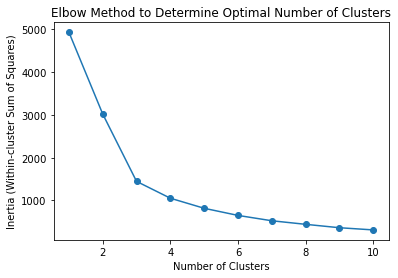

In [55]:
#Importing the required libraries for Kmeans clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the relevant features for clustering as longitude and latitude
selected_features = ['longitude', 'latitude']

# Filter the DataFrame based on specified LSOA names
filtered_df = merged_df[
    merged_df['lsoa01nm'].str.contains('Kingston Upon Hull|Humberside|East Riding of Yorkshire', case=False)
]

# Extract the selected features (longitude and latitude) for clustering
X = filtered_df[selected_features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.show()

In [56]:
#importing the required library
from sklearn.decomposition import PCA

# Applying PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply K-means clustering with K=3
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add the cluster labels back to the DataFrame
filtered_df['cluster'] = cluster_labels

# Output the DataFrame with cluster information
print(filtered_df)

      accident_index  accident_year_x accident_reference_x  \
83493  2020160914930             2020            160914930   
83494  2020160914930             2020            160914930   
83495  2020160918418             2020            160918418   
83496  2020160918418             2020            160918418   
83497  2020160936879             2020            160936879   
...              ...              ...                  ...   
87473  2020161012614             2020            161012614   
87474  2020161012614             2020            161012614   
87475  2020161012614             2020            161012614   
87476  2020161012744             2020            161012744   
87477  2020161012744             2020            161012744   

      location_easting_osgr location_northing_osgr longitude   latitude  \
83493              506050.0               428813.0 -0.393424  53.744936   
83494              506050.0               428813.0 -0.393424  53.744936   
83495              505576.0   

D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


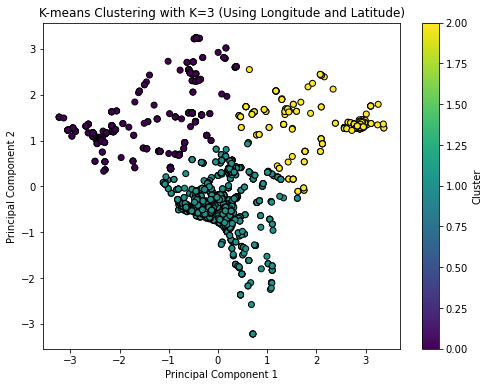

In [57]:
# Plot the data points with their clusters (2D visualization using PCA)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering with K=3 (Using Longitude and Latitude)')
plt.colorbar(label='Cluster')
plt.show()

In [58]:
#Evaluating the Kmeans clustering result

#importing the neecessary evaluation metrics
from sklearn.metrics import davies_bouldin_score, silhouette_score

#printing out the results

print(f'Internal Evaluation Measures for Kmeans Clustering')
print(f'********************************')
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(X, cluster_labels)
print(f'Davies-Bouldin Index: {db_score:.3f}')
# Calculate the Silhouette coefficient
s_score = silhouette_score(X, cluster_labels)
print(f'Silhouette Coefficient: {s_score:.3f}')


Internal Evaluation Measures for Kmeans Clustering
********************************
Davies-Bouldin Index: 0.685
Silhouette Coefficient: 0.625


D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


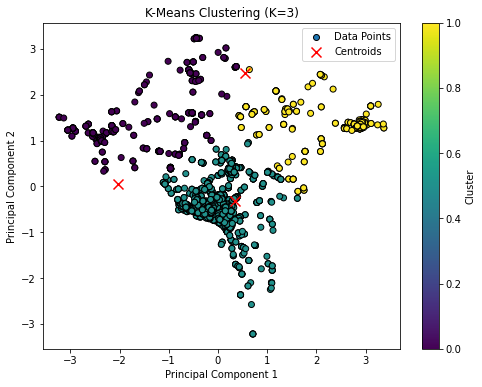

In [59]:
#Running KMeans with centroids

# Apply K-Means clustering with K=3
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels_kmeans = kmeans.fit_predict(X_scaled)

# Add the K-Means cluster labels back to the DataFrame
filtered_df['kmeans_cluster'] = cluster_labels_kmeans

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a scatter plot for K-Means clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels_kmeans, cmap='viridis', edgecolors='k', label='Data Points')

# Get cluster centroids from K-Means model
centroids_kmeans = kmeans.cluster_centers_

# Plot K-Means centroids
plt.scatter(centroids_kmeans[:, 0], centroids_kmeans[:, 1], c='red', marker='x', s=100, label='Centroids')

plt.title('K-Means Clustering (K=3)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


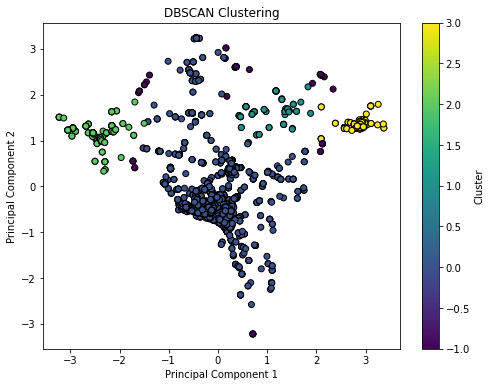

In [60]:
# Import the required libraries
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=30)
cluster_labels_dbscan = dbscan.fit_predict(X_scaled)

# Add the DBSCAN cluster labels back to the DataFrame
filtered_df['dbscan_cluster'] = cluster_labels_dbscan

# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a scatter plot for DBSCAN clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels_dbscan, cmap='viridis', edgecolors='k')
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [61]:
#Evaluating the DBSCAN clustering result

#importing the neecessary evaluation metrics
from sklearn.metrics import davies_bouldin_score, silhouette_score

#printing out the results

print(f'Internal Evaluation Measures for DBSCAN Clustering')
print(f'********************************')
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(X, cluster_labels_dbscan)
print(f'Davies-Bouldin Index: {db_score:.3f}')
# Calculate the Silhouette coefficient
s_score = silhouette_score(X, cluster_labels_dbscan)
print(f'Silhouette Coefficient: {s_score:.3f}')


Internal Evaluation Measures for DBSCAN Clustering
********************************
Davies-Bouldin Index: 2.441
Silhouette Coefficient: 0.448


D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


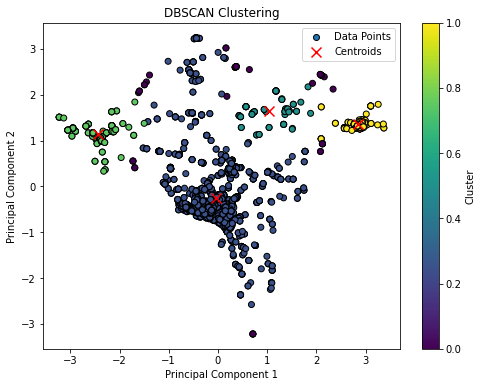

In [62]:
#Running DBSCAN with centroids

# Apply DBSCAN clustering with the specified parameters (eps and min_samples)
dbscan = DBSCAN(eps=0.5, min_samples=30)
cluster_labels_dbscan = dbscan.fit_predict(X_scaled)

# Add the DBSCAN cluster labels back to the DataFrame
filtered_df['dbscan_cluster'] = cluster_labels_dbscan

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a scatter plot for DBSCAN clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels_dbscan, cmap='viridis', edgecolors='k', label='Data Points')

# Calculate the centroids for each cluster
centroids = []
for cluster_id in np.unique(cluster_labels_dbscan):
    if cluster_id != -1:  # Ignore outliers with cluster_id -1
        cluster_points = X_pca[cluster_labels_dbscan == cluster_id]
        cluster_centroid = np.mean(cluster_points, axis=0)
        centroids.append(cluster_centroid)

centroids = np.array(centroids)

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')

plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()


### 6. Using outlier detection methods, identify unusual entries in your data set. Should you keep these entries in your data?

D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='age_of_driver', ylabel='Count'>

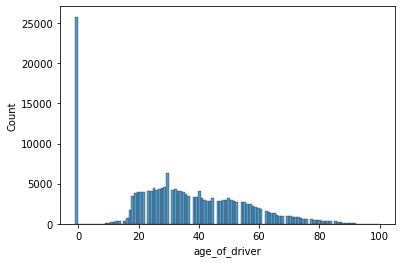

In [63]:
#checking outliers under the age_of_driver column
age_of_driver = merged_df["age_of_driver"]
sns.histplot(x = age_of_driver)

The outliers observed will be kept and cleaned since the count is high and over 250,000

In [64]:
#getting limits beyond which i will expect outliers in the age_of_driver column

q75, q25 = np.percentile(age_of_driver, [75, 25])

iqr = q75 - q25

print(iqr)

print(q25-1.5*iqr, q75+1.5*iqr)

print(q25-3*iqr, q75+3*iqr)

26.0
-16.0 88.0
-55.0 127.0


D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
def calculate_outlier_limits(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    return lower_limit, upper_limit

lower_limit, upper_limit = calculate_outlier_limits(age_of_driver)

lower_limit, upper_limit 

D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(-16.0, 88.0)

D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


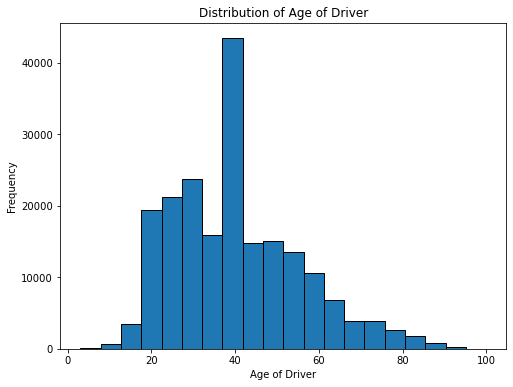

In [66]:
#Cleaning outliers from the age_of_driver entries

# Calculate the median age of the driver (excluding negative values)
median_age = np.median(merged_df[merged_df["age_of_driver"] >= 0]["age_of_driver"])

# Replace negative values with the median age
merged_df.loc[merged_df["age_of_driver"] < 0, "age_of_driver"] = median_age

# Plot the "age_of_vehicle" column
plt.figure(figsize=(8, 6))
plt.hist(merged_df["age_of_driver"], bins=20, edgecolor='k')
plt.xlabel("Age of Driver")
plt.ylabel("Frequency")
plt.title("Distribution of Age of Driver")
plt.show()


In [67]:
#Detecting Outliers in the age_of_vehicle entries

D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
merged_df["age_of_vehicle"].unique()

D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([ 6,  5, -1,  1,  7,  2, 11, 16,  3, 14, 15,  8, 17, 13,  4,  9,  0,
       12, 10, 19, 54, 22, 20, 18, 33, 24, 21, 23, 32, 29, 46, 26, 28, 44,
       25, 34, 27, 30, 51, 45, 48, 38, 31, 43, 39, 62, 37, 57, 41, 36, 60,
       64, 58, 61, 50, 86, 53, 35, 55, 92, 49, 88, 42, 67, 84, 40, 52, 56,
       66, 78, 47, 68, 96, 63], dtype=int64)

D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


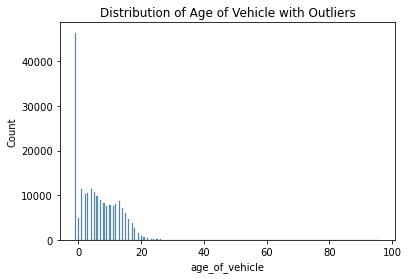

In [69]:
#checking outliers under the age_of_vehicle column
age_of_vehicle = merged_df["age_of_vehicle"]
sns.histplot(x = age_of_vehicle)
plt.title("Distribution of Age of Vehicle with Outliers")
plt.show()

The outliers observed (<0) will be kept and cleaned since the count is high and over 400,000

In [70]:
#getting limits beyond which i will expect outliers in the age_of_vehicle column

q75, q25 = np.percentile(age_of_vehicle, [75, 25])

iqr = q75 - q25

print(iqr)

print(q25-1.5*iqr, q75+1.5*iqr)

print(q25-3*iqr, q75+3*iqr)

11.0
-16.5 27.5
-33.0 44.0


D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
def calculate_outlier_limits(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    return lower_limit, upper_limit

lower_limit, upper_limit = calculate_outlier_limits(age_of_vehicle)

lower_limit, upper_limit 

D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(-16.5, 27.5)

D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


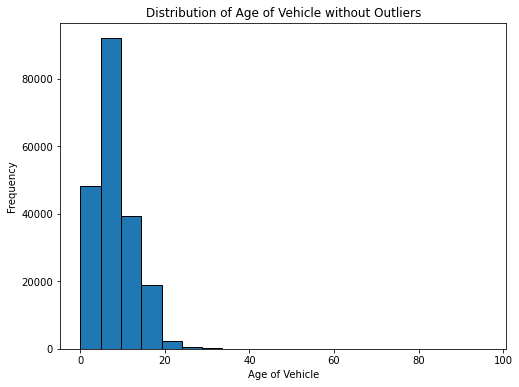

In [72]:
#Cleaning outliers from the age_of_vehicle entries

# Calculate the median age of the vehicle (excluding negative values)
median_age = np.median(merged_df[merged_df["age_of_vehicle"] >= 0]["age_of_vehicle"])

# Replace negative values with the median age
merged_df.loc[merged_df["age_of_vehicle"] < 0, "age_of_vehicle"] = median_age

# Plot the "age_of_vehicle" column
plt.figure(figsize=(8, 6))
plt.hist(merged_df["age_of_vehicle"], bins=20, edgecolor='k')
plt.xlabel("Age of Vehicle")
plt.ylabel("Frequency")
plt.title("Distribution of Age of Vehicle without Outliers")
plt.show()


D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


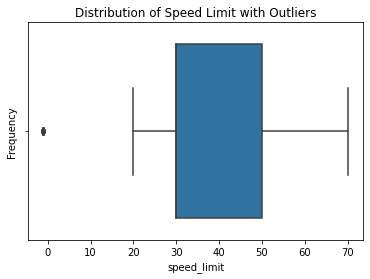

In [73]:
#checking outliers under the speed_limit column
speed_limit = merged_df["speed_limit"]

sns.boxplot(x = speed_limit)
plt.ylabel("Frequency")
plt.title("Distribution of Speed Limit with Outliers")
plt.show()

In [74]:
#getting limits beyond which i will expect outliers in the speed_limit column

q75, q25 = np.percentile(speed_limit, [75, 25])

iqr = q75 - q25

print(iqr)

print(q25-1.5*iqr, q75+1.5*iqr)

print(q25-3*iqr, q75+3*iqr)

20.0
0.0 80.0
-30.0 110.0


D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [75]:
def calculate_outlier_limits(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    return lower_limit, upper_limit

lower_limit, upper_limit = calculate_outlier_limits(speed_limit)

lower_limit, upper_limit 

D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0.0, 80.0)

D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


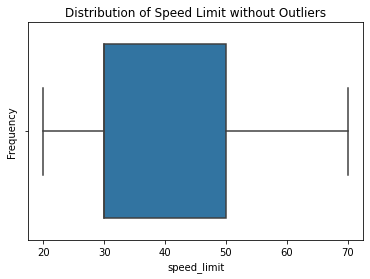

In [76]:
#Cleaning outliers from the speed_limit entries

# Calculate the median age of the speed_limit (excluding negative values)
median_age = np.median(merged_df[merged_df["speed_limit"] >= 0]["speed_limit"])

# Replace negative values with the median age
merged_df.loc[merged_df["speed_limit"] < 0, "speed_limit"] = median_age

# Plot the "speed_limit" column
sns.boxplot(x = speed_limit)
plt.ylabel("Frequency")
plt.title("Distribution of Speed Limit without Outliers")
plt.show()


D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


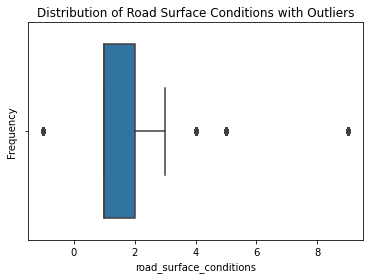

In [77]:
#checking outliers under the road_surface_conditions column

road_surface_conditions = merged_df["road_surface_conditions"]

sns.boxplot(x = road_surface_conditions)
plt.ylabel("Frequency")
plt.title("Distribution of Road Surface Conditions with Outliers")
plt.show()

In [78]:
merged_df["road_surface_conditions"].unique()

D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([ 9,  2,  1,  4,  3,  5, -1], dtype=int64)

In [79]:
#getting limits beyond which i will expect outliers in the road_surface_conditions column

q75, q25 = np.percentile(road_surface_conditions, [75, 25])

iqr = q75 - q25

print(iqr)

print(q25-1.5*iqr, q75+1.5*iqr)

print(q25-3*iqr, q75+3*iqr)

1.0
-0.5 3.5
-2.0 5.0


D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [80]:
def calculate_outlier_limits(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    return lower_limit, upper_limit

lower_limit, upper_limit = calculate_outlier_limits(road_surface_conditions)

lower_limit, upper_limit 

D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(-0.5, 3.5)

D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


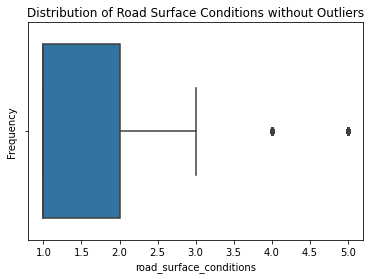

In [81]:
#Cleaning outliers from the road_surface_condition entries

# Calculate the median age of the road_surface_conditions (excluding negative values & >5 values)
median_age = np.median(merged_df[(merged_df["road_surface_conditions"] >= 0) & 
            (merged_df["road_surface_conditions"] <= 5)]["road_surface_conditions"])

# Replace negative values with the median age
merged_df.loc[(merged_df["road_surface_conditions"] < 0) | 
              (merged_df["road_surface_conditions"] > 5), "road_surface_conditions"] = median_age

# Plot the "speed_limit" column
sns.boxplot(x = road_surface_conditions)
plt.ylabel("Frequency")
plt.title("Distribution of Road Surface Conditions without Outliers")
plt.show()

D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


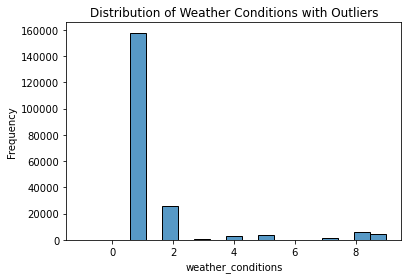

In [82]:
#checking outliers under the weather_conditions column

weather_conditions = merged_df["weather_conditions"]

sns.histplot(x = weather_conditions)
plt.ylabel("Frequency")
plt.title("Distribution of Weather Conditions with Outliers")
plt.show()

In [83]:
merged_df["weather_conditions"].unique()

D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([ 9,  1,  2,  4,  8,  5,  7,  3,  6, -1], dtype=int64)

In [84]:
#getting limits beyond which i will expect outliers in the weather_conditions column

q75, q25 = np.percentile(weather_conditions, [75, 25])

iqr = q75 - q25

print(iqr)

print(q25-1.5*iqr, q75+1.5*iqr)

print(q25-3*iqr, q75+3*iqr)

0.0
1.0 1.0
1.0 1.0


D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [85]:
def calculate_outlier_limits(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    return lower_limit, upper_limit

lower_limit, upper_limit = calculate_outlier_limits(weather_conditions)

lower_limit, upper_limit 

D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1.0, 1.0)

D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


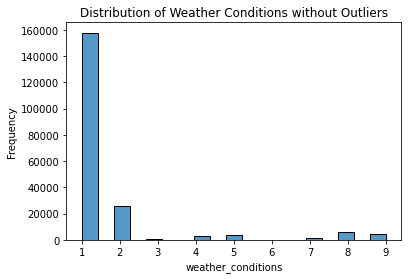

In [86]:
#Cleaning outliers from the weather_conditions entries

# Calculate the median weather_conditions (excluding negative values)
median_age = np.median(merged_df[merged_df["weather_conditions"] >= 0]["weather_conditions"])

# Replace negative values with the median age
merged_df.loc[merged_df["weather_conditions"] < 0, "weather_conditions"] = median_age

# Plot the "speed_limit" column
sns.histplot(x = weather_conditions)
plt.ylabel("Frequency")
plt.title("Distribution of Weather Conditions without Outliers")
plt.show()

Outlier detection for geo-data multivaraite features: longitude & latitude

#### Showing the various accidents locations before applying the multivariate outlier detection methods

D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


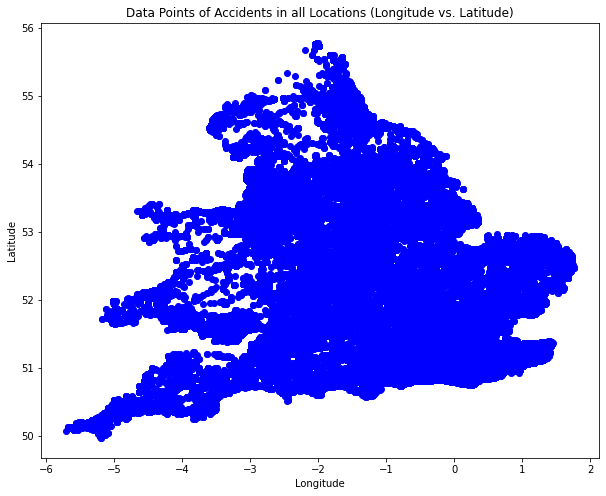

In [87]:
# Select the relevant features for plotting as longitude and latitude
selected_features = ['longitude', 'latitude']

# Extract the selected features (longitude and latitude) for plotting
X = merged_df[selected_features]

# Visualize the data points without applying LOF
plt.figure(figsize=(10, 8))
plt.scatter(X['longitude'], X['latitude'], c='blue')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Data Points of Accidents in all Locations (Longitude vs. Latitude)')
plt.show()


#### Applying Local Outlier Factor (LOF) to detect outliers

D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


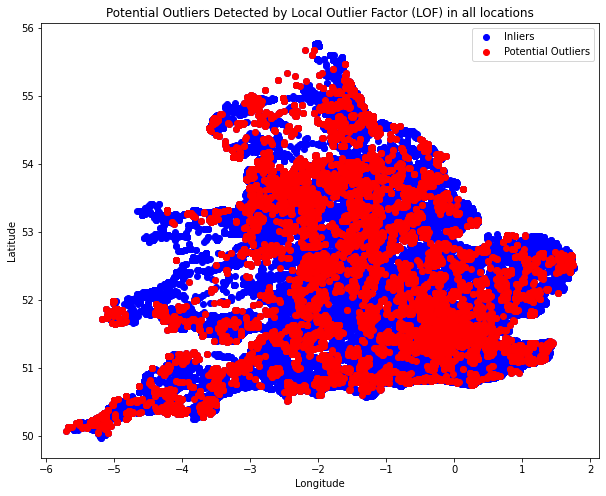

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

# Assuming you already have the DataFrame merged_df with 'longitude' and 'latitude' columns

# Select the relevant features for LOF as longitude and latitude
selected_features = ['longitude', 'latitude']

# Extract the selected features (longitude and latitude) for LOF
X = merged_df[selected_features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=30, contamination=0.1)
y_pred = lof.fit_predict(X_scaled)

# Filter the potential outlier data points
LOF_anomalies = merged_df[y_pred == -1]

# Visualize the data points with potential outliers in red
plt.figure(figsize=(10, 8))
plt.scatter(X['longitude'], X['latitude'], c='blue', label='Inliers')
plt.scatter(LOF_anomalies['longitude'], LOF_anomalies['latitude'], c='red', label='Potential Outliers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Potential Outliers Detected by Local Outlier Factor (LOF) in all locations')
plt.legend()
plt.show()


The outliers in red observed will kept as removing such amount of data will affect the results of any model

#### Applying Isolation Forest (IF) to detect outliers

D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


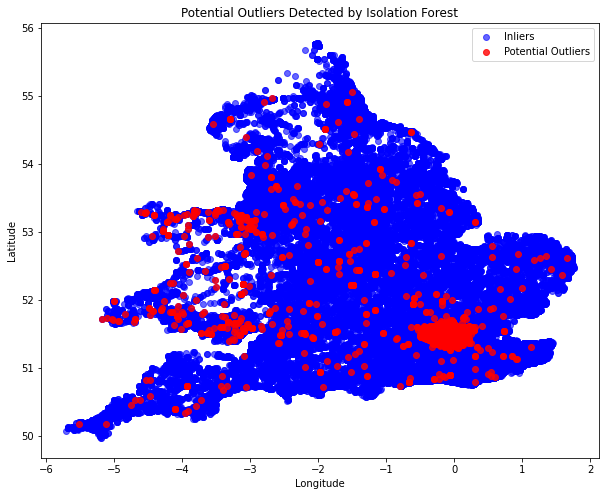

In [89]:
#import the required library
from sklearn.ensemble import IsolationForest

# Select the numeric features for outlier detection
numeric_features_df = merged_df.select_dtypes(include=['number'])

# Create an instance of the IsolationForest model
ranst = np.random.RandomState(0)
model = IsolationForest(max_samples=100, random_state=ranst, contamination=0.05) 

# Fit the IsolationForest model on the numeric features
model.fit(numeric_features_df)

# Get the anomaly scores for each data point
if_scores = model.decision_function(numeric_features_df)

# Predict the labels for inliers and outliers (-1 for outliers, 1 for inliers)
if_anomalies = model.predict(numeric_features_df)

# Convert the predicted labels to 0 for inliers and 1 for outliers
if_anomalies = pd.Series(if_anomalies).replace([-1, 1], [1, 0])

# Filter the merged_df DataFrame to get potential outlier data points
if_anomalies_df = merged_df[if_anomalies == 1]

# Scatter plot for the entire dataset (merged_df)
plt.figure(figsize=(10, 8))
plt.scatter(merged_df['longitude'], merged_df['latitude'], c='blue', label='Inliers', alpha=0.6)

# Scatter plot for potential outlier data points (if_anomalies_df)
plt.scatter(if_anomalies_df['longitude'], if_anomalies_df['latitude'], c='red', label='Potential Outliers', alpha=0.8)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Potential Outliers Detected by Isolation Forest')
plt.legend()
plt.show()


### 7. Can you develop a classification model using the provided data that accurately predicts fatal injuries sustained in road traffic accidents, with the aim of informing and improving road safety measures?

D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 72x48 with 0 Axes>

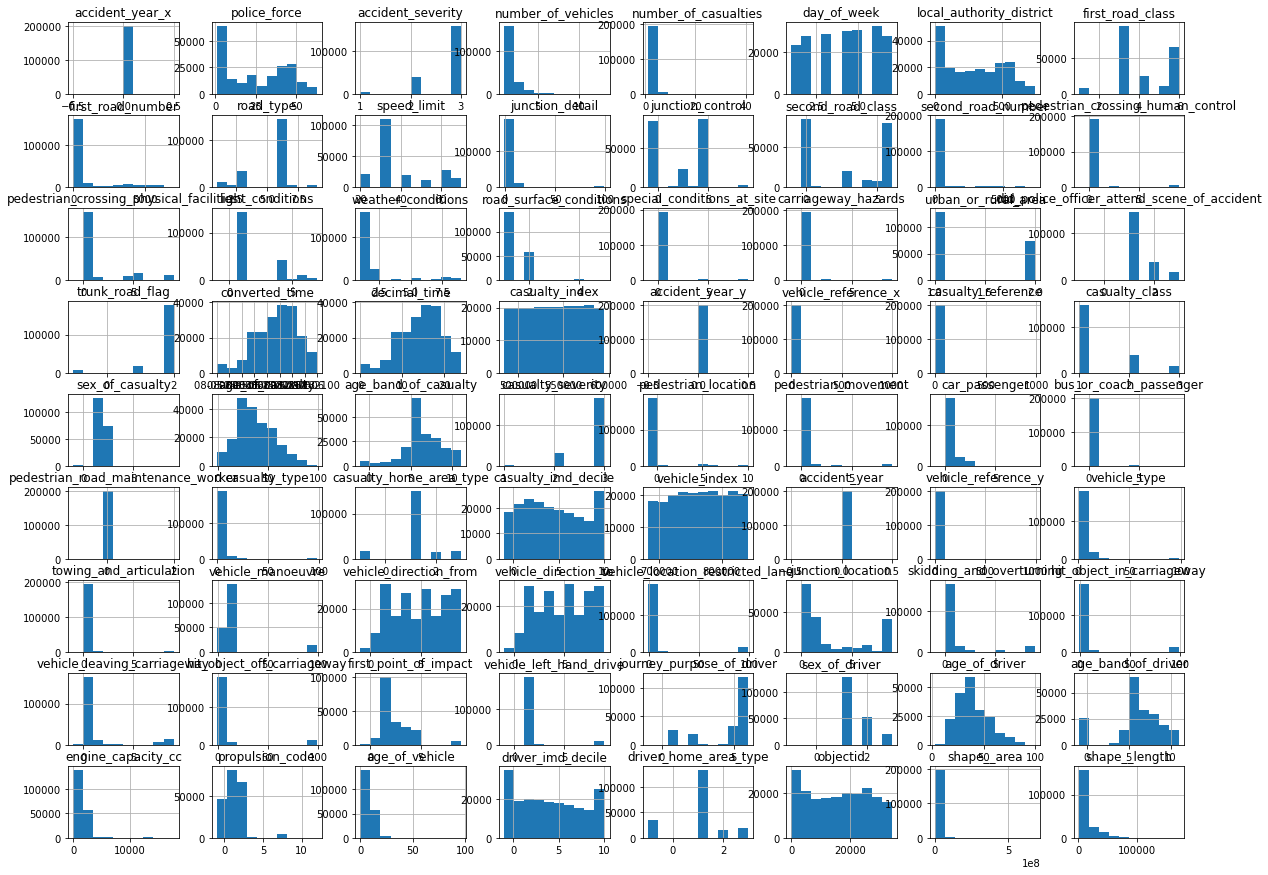

In [90]:
#charts display of all the numerical datatypes
plt.figure(dpi = 12)
merged_df.hist(figsize = (20, 15))
plt.show()

In [91]:
#Checking the available features for selection
merged_df.info()

D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 201943 entries, 0 to 201942
Data columns (total 90 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   accident_index                               201943 non-null  object        
 1   accident_year_x                              201943 non-null  int64         
 2   accident_reference_x                         201943 non-null  object        
 3   location_easting_osgr                        201943 non-null  object        
 4   location_northing_osgr                       201943 non-null  object        
 5   longitude                                    201943 non-null  object        
 6   latitude                                     201943 non-null  object        
 7   police_force                                 201943 non-null  int64         
 8   accident_severity                            201943 non-null  in

### Random Forest (RF) Classifier Model to predict fatal injuries sustained in road traffic accidents

In [92]:
#Importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler

D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [93]:
#Feature Selection

# Create the feature set X and target variable y
X = merged_df.drop(columns=['casualty_severity', 'converted_time'])  # Drop the target variable and 'converted_time'
y = merged_df['casualty_severity']  # Target variable 'casualty_severity' with values 1 (fatal), 2 (serious), 3 (slight)

# Label encode the categorical features in X
label_encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']):
    X[col] = label_encoder.fit_transform(X[col])

#Pre-process the data

# Balance the data using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train model

# Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RandomForestClassifier(random_state=42)

In [94]:
#Evaluate Model with feature importance

# Get feature importance from the trained model
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_classifier.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                               Feature  Importance
8                    accident_severity    0.582505
10                number_of_casualties    0.027913
51                       casualty_type    0.023617
41                  casualty_reference    0.018642
44                     age_of_casualty    0.014002
..                                 ...         ...
49              bus_or_coach_passenger    0.000160
50  pedestrian_road_maintenance_worker    0.000073
38                     accident_year_y    0.000000
55                       accident_year    0.000000
1                      accident_year_x    0.000000

[88 rows x 2 columns]


D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Classification Report:
              precision    recall  f1-score   support

       Fatal       0.92      0.86      0.88       421
     Serious       0.93      0.95      0.94      6257
      Slight       0.99      0.99      0.99     33711

    accuracy                           0.98     40389
   macro avg       0.95      0.93      0.94     40389
weighted avg       0.98      0.98      0.98     40389



<Figure size 576x432 with 0 Axes>

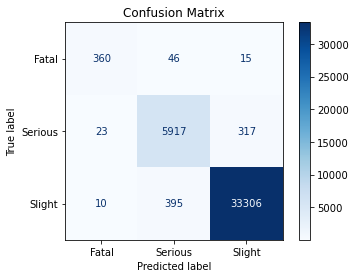

In [95]:
#Evaluate Model with the classification report & confusion matrix

# Get the predicted labels on the testing set
y_pred = rf_classifier.predict(X_test)

# Map the original target values back to their corresponding labels
target_names = ['Fatal', 'Serious', 'Slight']
y_test_labels = y_test.map({1: 'Fatal', 2: 'Serious', 3: 'Slight'})
y_pred_labels = pd.Series(y_pred).map({1: 'Fatal', 2: 'Serious', 3: 'Slight'})

# Generate the classification report
classification_rep = classification_report(y_test_labels, y_pred_labels, target_names=target_names)

# Print the classification report
print("\nClassification Report:")
print(classification_rep)

# Generate the confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=target_names)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

### Artificial Neural Network (ANN) Classifier Model to predict fatal injuries sustained in road traffic accidents

In [96]:
#Importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils

D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
D:\ANACONDA_Install\lib\site-packages\h5py\__init__.py:46: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  from ._conv import register_converters as _register_converters


In [97]:
#Feature selection 

#Create the feature set X and target variable y
X = merged_df.drop(columns=['casualty_severity', 'converted_time'])  # Drop the target variable and 'converted_time'
y = merged_df['casualty_severity']  # Target variable 'casualty_severity' with values 1 (fatal), 2 (serious), 3 (Slight)

#Pre-processing

# Subtract 1 from the target variable to make it start from 0
y = y - 1

# Label encode the categorical features in X
label_encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']):
    X[col] = label_encoder.fit_transform(X[col])

# Convert the target variable y to one-hot encoded format
y = np_utils.to_categorical(y, 3)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Building the model architecture

# Build the simple ANN model with one hidden layer and fewer nodes
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Add dropout with a rate of 0.5 to prevent overfitting
model.add(Dense(3, activation='softmax'))

model.summary()

D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                2848      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2,947
Trainable params: 2,947
Non-trainable params: 0
_________________________________________________________________


In [98]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

history

D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch 1/10
5049/5049 [==============================] - 17s 3ms/step - loss: 0.1898 - accuracy: 0.9240 - val_loss: 0.0969 - val_accuracy: 0.9520
Epoch 2/10
5049/5049 [==============================] - 14s 3ms/step - loss: 0.0974 - accuracy: 0.9491 - val_loss: 0.0863 - val_accuracy: 0.9553
Epoch 3/10
5049/5049 [==============================] - 14s 3ms/step - loss: 0.0878 - accuracy: 0.9512 - val_loss: 0.0856 - val_accuracy: 0.9562
Epoch 4/10
5049/5049 [==============================] - 14s 3ms/step - loss: 0.0865 - accuracy: 0.9516 - val_loss: 0.0861 - val_accuracy: 0.9557
Epoch 5/10
5049/5049 [==============================] - 13s 3ms/step - loss: 0.0819 - accuracy: 0.9522 - val_loss: 0.0858 - val_accuracy: 0.9564
Epoch 6/10
5049/5049 [==============================] - 13s 3ms/step - loss: 0.0868 - accuracy: 0.9527 - val_loss: 0.0814 - val_accuracy: 0.9572
Epoch 7/10
5049/5049 [==============================] - 13s 3ms/step - loss: 0.0802 - accuracy: 0.9539 - val_loss: 0.0805 - val_ac

  26/1263 [..............................] - ETA: 2s - loss: 0.0720 - accuracy: 0.9543 

D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1263/1263 [==============================] - 3s 2ms/step - loss: 0.0840 - accuracy: 0.9568
Test Accuracy: 0.96
1263/1263 [==============================] - 2s 2ms/step

Classification Report:
              precision    recall  f1-score   support

       Fatal       0.78      0.78      0.78       421
     Serious       0.88      0.85      0.87      6257
      Slight       0.97      0.98      0.98     33711

    accuracy                           0.96     40389
   macro avg       0.88      0.87      0.87     40389
weighted avg       0.96      0.96      0.96     40389



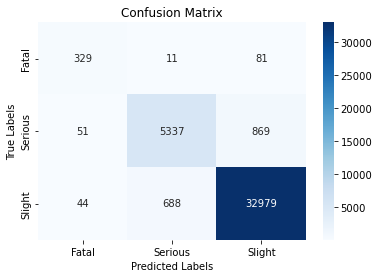

In [99]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Get the predicted labels on the testing set
y_pred_prob = model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=-1) + 1

# Map the original target values back to their corresponding class labels
target_names = ['Fatal', 'Serious', 'Slight']
y_test_labels = pd.Series(y_test.argmax(axis=-1) + 1).map({1: 'Fatal', 2: 'Serious', 3: 'Slight'})
y_pred_labels = pd.Series(y_pred).map({1: 'Fatal', 2: 'Serious', 3: 'Slight'})

# Generate the classification report
classification_rep = classification_report(y_test_labels, y_pred_labels, target_names=target_names)

# Print the classification report
print("\nClassification Report:")
print(classification_rep)

# Generate the confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=target_names)

# Plot the confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Confusion Matrix")
plt.show()

D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


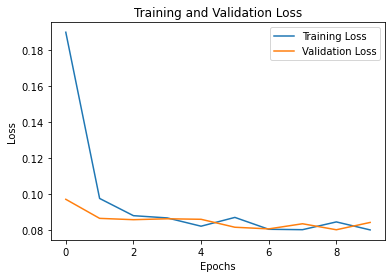

In [100]:
# Plot training and validation loss
#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

D:\ANACONDA_Install\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


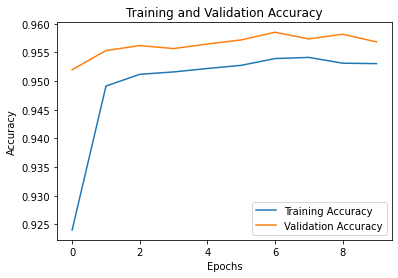

In [101]:
# Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['accuracy'], label='Training Accuracy')
#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()